In [1]:
'''Sub_Task 1.1: Loading the data from the three data files into three Pandas DataFrames and checking 
whether the loaded data is equivalent to the data contained in the raw data files.'''
#################################      TASK 1.1 DATA ACQUISITION AND PREPARATION      ################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#1.1 LOADING DATA & CHECKING FOR EQUIVALENCE TO RAW DATA

df1=pd.read_csv('data1.csv')
print(f'Data 1 Shape: {df1.shape}') #100x15
df2=pd.read_csv('data2.csv')
print(f'Data 2 Shape: {df2.shape}') # 100x13
df3=pd.read_csv('data3.csv')
print(f'Data 3 Shape: {df3.shape}') # 99x27

print('\n================================ DATA 1 INFO ===============================\n')
print(df1.info) 
print('\n================================ DATA 2 INFO ===============================\n')
print(df2.info) 
print('\n================================ DATA 3 INFO ===============================\n')
print(df3.info) 


print('\n=================================== DATA1 COLUMNS ===============================================\n')
print(df1.columns)
print('\n=================================== DATA2 COLUMNS ===============================================\n')
print(df2.columns)
print('\n=================================== DATA3 COLUMNS ===============================================\n')
print(df3.columns)


print('\n============================== DATA 1 DATATYPES ===============================\n')
print(df1.dtypes)
print('\n============================== DATA 2 DATATYPES ===============================\n')
print(df2.dtypes)
print('\n============================== DATA 3 DATATYPES ===============================\n')
print(df3.dtypes)


#changing data type of ID to STRING to get frequency of ID
df1[["id"]] = df1[["id"]].astype("string")
df2[["id"]] = df2[["id"]].astype("string")
df3[["id"]] = df3[["id"]].astype("string")

print('\n================================== DATA 1 DESCRIBE ID  =================================\n')
print(df1['id'].describe())        #looking for repeated primary key - none found
print('\n============================= ==== DATA 2 DESCRIBE ID =================================\n')
print(df2['id'].describe())        #looking for repeated primary key - none found
print('\n================================== DATA 3 DESCRIBE ID =================================\n')
print(df3['id'].describe())        #looking for repeated primary key - 10180 count is 3

print('\n================================= DATA 1 NaN COUNTS =================================\n')
print(df1.isnull().sum())              # no NaN value found
print('\n================================= DATA 2 NaN COUNTS =================================\n')
print(df2.isnull().sum())              # no NaN value found
print('\n================================= DATA 3 NaN COUNTS =================================\n')
print(df3.isnull().sum())              #NaN value in: normalised-value 38, price 4



Data 1 Shape: (100, 15)
Data 2 Shape: (100, 13)
Data 3 Shape: (99, 27)

================================ DATA 1 INFO ===============================

<bound method DataFrame.info of        id  symboling  normalised-losses    make fuel-type aspiration  \
0   12693          2                164    audi       gas        std   
1   26247          2                164    audi       gas        std   
2   28588          1                158    audi       gas        std   
3   21463          1                158    audi       gas      turbo   
4   31110          2                192     bmw       gas        std   
..    ...        ...                ...     ...       ...        ...   
95  16258          3                150    saab       gas      turbo   
96  22065          2                104    saab       gas      turbo   
97  23596          2                 83  subaru       gas        std   
98  33908          2                 83  subaru       gas        std   
99  10215          2      

Name: id, dtype: object

================================= DATA 1 NaN COUNTS =================================

id                   0
symboling            0
normalised-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
dtype: int64

================================= DATA 2 NaN COUNTS =================================

id                   0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

================================= DATA 3 NaN COUNTS =================================

id                    0
symboling         

In [2]:
'''Sub-Task 1.2: Merging the obtained three DataFrames into a single one that should contain all cars from the three
DataFrames, where each car has a unique ID and is described by the 27 attributes listed above'''
########################################## TASK 1.2. MERGING AND WRANGLING ###########################################

#MERGING
print('\nMERGING DATA 1 AND DATA 2 ON ID...')
df_1_2=pd.merge(df1, df2, on ="id" ) #step 1: merged data1 and data2 using 'id' column
print(f'\nMERGED DATA1 and DATA2 SHAPE: {df_1_2.shape}') #100x27
print('\n============================== DATA 1 & DATA 2 MERGED COLUMNS ===============================\n')
print(df_1_2.columns)


print('\nAPPENDING MERGED DATA ON DATA 3... \n\nREINDEXING... \n\nREMOVING DUPLICATE VALUES... ')
df4 = df3.append(df_1_2, ignore_index=True, verify_integrity=True) #merging, new index, no duplicate value 
df4.drop_duplicates(inplace=True)


print(f'\nRESULTANT DATA SHAPE OF DF4: {df4.shape}')# 198x27


print('\n=================================== DF4 HEAD ================================================\n')
print(df4.head())
print('\n=================================== DF4 TAIL ================================================\n')
print(df4.tail())



#WRANGLING
print('\nSORTING DATA BY ID AND REINDEXING DATAFRAME...')                                        
df4.sort_values(by='id',inplace=True, ignore_index=True)    #reindex the df sorted on id for cleaner view



print('\n==================================== DATA DATATYPES ===============================\n')
print(df4.dtypes)
df4[["symboling"]] = df4[["symboling"]].astype("string") #symboling has int values but is categorical in nature



print('\n==================================== DATA INFO ===============================\n')
print(df4.info) 



print('\n==================================== ID VALUE COUNTS =================================\n')
print(df4['id'].value_counts())        #looking for repeated primary key



print('\n===================================== NaN COUNTS =================================\n')
print(df4.isnull().sum())              #NaN value in: normalised-value 38, price 4

print('\n NaN VALUES FOR PRICE...\n')
print(df4[df4['price'].isnull()].sort_values(by='make'))# 4 values can be replaced by mean price

print('\n NaN VALUES FOR NORMALISED LOSSES...\n')
print(df4[df4['normalised-losses'].isnull()].sort_values(by='make')) #Replacing 38 values with mean might skew the data thus further categorization might be needed


str_columns=['id','symboling','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
num_columns=['normalised-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']


'''
Alternative method: 
df4.describe(include=[np.number]).columns to get all numeric column names
and df4.describe(exclude=[np.number]).columns to get the remaining columns
converting series to list using list()
'''


print('\n===================================== DESCRIBE STRING COLUMNS ==============================\n')
for i in str_columns:                                                
    print(df4[i].describe())           #verify with data specification: fuel-type, num-of-doors, num-of-cylinders have more than expected values.
    print('\n')


    
print('\n===================================== DESCRIBE NUMERIC COLUMNS ==============================\n')
for i in num_columns:
    print(f'{i} Max:{df4[i].max()}')
    print(f'{i} Min:{df4[i].min()}\n') #verify with data specification: Found HP=1100


    
print('\n===================================== FUEL-TYPE VALUE COUNTS ==================================\n')
print(df4['fuel-type'].value_counts())



print('\n===================================== NUM-OF-DOORS VALUE COUNTS ================================\n')
print(df4['num-of-doors'].value_counts())



print('\n===================================== NUM-OF-CYLINDERS VALUE COUNTS ============================\n')
print(df4['num-of-cylinders'].value_counts())



print('\n===================================== FUEL-SYSTEM VALUE COUNTS ==================================\n')
print(df4['fuel-system'].value_counts())



print('\n====================================== CARS WITH OUT OF RANGE HP ================================\n')
print(df4[df4['horsepower']>288.0])   #how many values have out of range horse power<one>: S.No:122  ID:28588





MERGING DATA 1 AND DATA 2 ON ID...

MERGED DATA1 and DATA2 SHAPE: (100, 27)

============================== DATA 1 & DATA 2 MERGED COLUMNS ===============================

Index(['id', 'symboling', 'normalised-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

APPENDING MERGED DATA ON DATA 3... 

REINDEXING... 

REMOVING DUPLICATE VALUES... 

RESULTANT DATA SHAPE OF DF4: (198, 27)

=================================== DF4 HEAD ================================================

      id  symboling  normalised-losses        make fuel-type aspiration  \
0  25411          3                NaN  mitsubishi       gas      turbo   
1  21573          0         

count        198
unique        21
top       toyota
freq          33
Name: make, dtype: object


count     198
unique      3
top       gas
freq      179
Name: fuel-type, dtype: object


count     198
unique      2
top       std
freq      162
Name: aspiration, dtype: object


count      198
unique       4
top       four
freq        61
Name: num-of-doors, dtype: object


count       198
unique        5
top       sedan
freq         95
Name: body-style, dtype: object


count     198
unique      3
top       fwd
freq      116
Name: drive-wheels, dtype: object


count       198
unique        2
top       front
freq        195
Name: engine-location, dtype: object


count     198
unique      6
top       ohc
freq      144
Name: engine-type, dtype: object


count      198
unique       7
top       four
freq       155
Name: num-of-cylinders, dtype: object


count      198
unique       8
top       mpfi
freq        90
Name: fuel-system, dtype: object



===================================== DESCRIBE NU

In [3]:
'''Sub-Task 1.3: Cleaning the data by using the knowledge you have learned, deal with the issues existing in the data,
e.g., missing values, duplicates, impossible values and extra whitespaces. However, you must NOT modify any parts of 
data that do not suffer issues'''
####################################### TASK 1.3 DATA CLEANING ##################################################

'''
Observations:
0. Datatype of horsepower, peak-rpm: should be float instead of int64
1. Normalized-losses has NaN values
2. Price has NaN values
3. Id 10180 occurs 2 times
4. Mum-of-doors (four, two) has typo: numeric values 2 and 4
5. Num-of-cylinders has typo: sixth instead of six
6. Fuel-type has white spaces in diesel
7. Fuel-system has typo: 'Mpfi' instead of mpfi
8. Horsepower is out of range for one value: 1100 for car id 28588
'''

#changing datatypes
print('\nCHANGING DATATYPE OF peak-rpm, horsepower FROM INT64 TO FLOAT...')
df4[["peak-rpm"]] = df4[["peak-rpm"]].astype("float")
df4[["horsepower"]] = df4[["horsepower"]].astype("float")


print('\n==================================== DATA DATATYPES ===============================\n')
print(df4.dtypes)

    

#removing typos
print('\n\nREMOVING TYPOS...')
df4['num-of-doors']=df4['num-of-doors'].replace(2, "two")   #print('replacing (2, 4) with (two, four) in num-of-doors')
df4['num-of-doors']=df4['num-of-doors'].replace(4, "four")  #POINT NO. 4 FIXED
df4['num-of-cylinders']=df4['num-of-cylinders'].replace('sixth','six')   #POINT NO. 5 FIXED




#remove whitespaces
print('\n\nREMOVING LEADING AND TRAILING WHITESPACES...')
for i in str_columns:               #print('Removing whitespaces from string fields')
    df4[i]=df4[i].str.strip(" ")    #POINT NO. 6 FIXED
    df4[i]=df4[i].str.lower()       #converting to lowercase; POINT NO. 7 FIXED                                 



#removing out of range values
print('\n\nREMOVING OUT OF RANGE VALUES...')
df4[df4['horsepower']>288.0]        #finding similar cars
df4[(df4['make']=='audi') & (df4['fuel-type']=='gas') & (df4['engine-size']==136) & (df4['engine-type']=='ohc') & (df4['compression-ratio']==8.5)]
df4['horsepower']=df4['horsepower'].replace(1100, 110) #POINT NO. 8 FIXED



#removing missing values: normalized-losses: 38 NaN values, price: 4 NaN values
print('\n\nREPLACING NULL VALUES IN PRICE WITH MEAN PRICE...')
df4['price']=df4['price'].fillna(value=df4['price'].mean())        #NaN replaced with mean price

print('\n\nREPLACING NULL VALUES IN NORMALISED LOSSES WITH MEAN VALUE FOR THAT MAKE, FUEL-TYPE & FUEL-SYSTEM...')
df4['normalised-losses']=df4.groupby(['make', 'fuel-type', 'fuel-system'])['normalised-losses'].transform(lambda x: x.fillna(x.mean()))

print('\n\nREPLACING NULL VALUES IN NORMALISED LOSSES FOR CARS WITH NO MATCH WITH MEAN NORMALISED-LOSS...')  #9 values (alfa-romero, isuzu, mercury)
df4['normalised-losses']=df4.groupby(['make'])['normalised-losses'].transform(lambda x: x.fillna(df4['normalised-losses'].mean()))



#removing duplicates
print('\n\nREMOVING DUPLICATE ROWS...')
df4.drop_duplicates(inplace=True)
print(f'\n\nFINAL DATA SHAPE={df4.shape}')



CHANGING DATATYPE OF peak-rpm, horsepower FROM INT64 TO FLOAT...

==================================== DATA DATATYPES ===============================

id                    string
symboling             string
normalised-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


REMOVING TYPOS...


REMOVING LEADING AND TRAILING

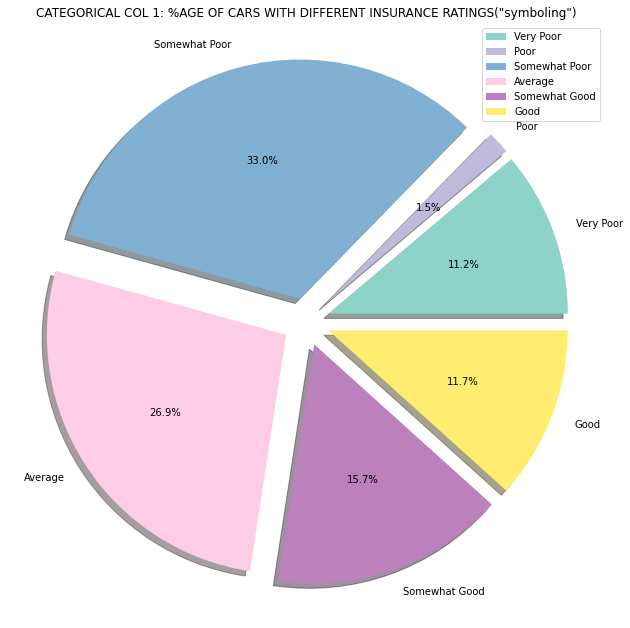

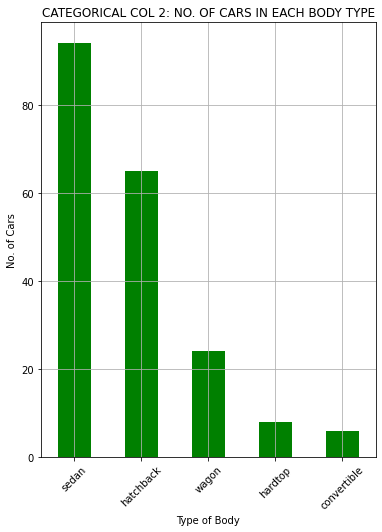

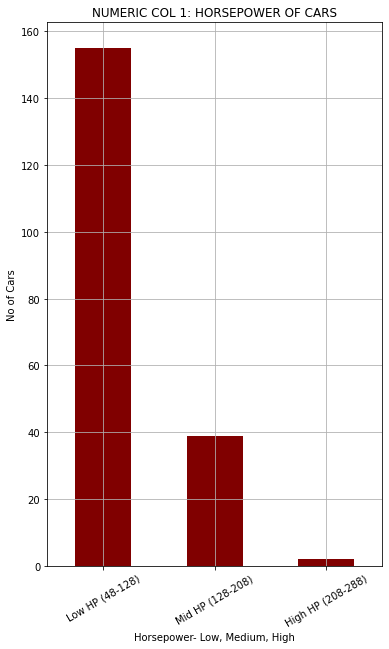

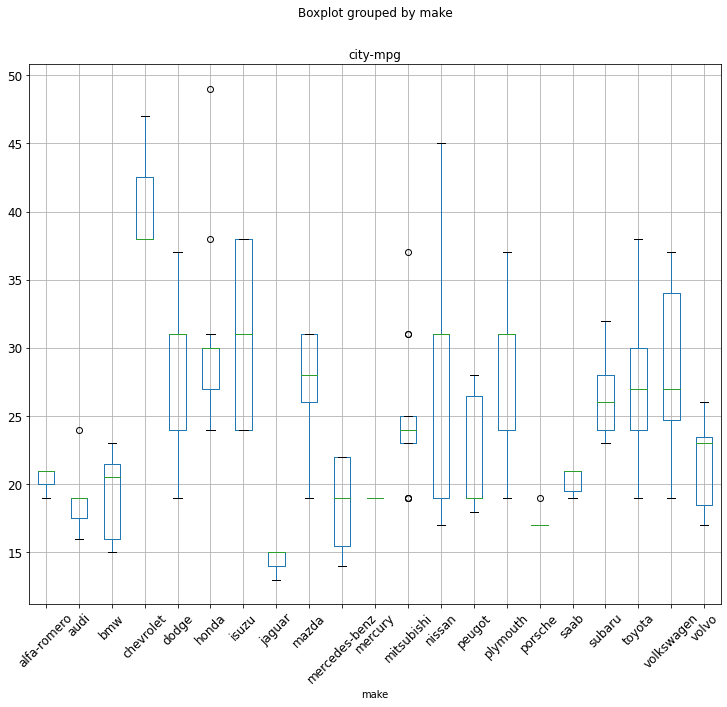

In [4]:
'''Sub-Task 2.1: Choosing two columns with categorical and numerical values, respectively, and visualising each of 
them in an appropriate way. Note that you need to explore and identify potentially important columns (and can justify 
your choice) instead of making random choice.'''
################################################## TASK 2 DATA EXPLORATION ##########################################

%matplotlib inline

#CATEGORICAL VALUE - SYMBOLING (Exploded piechart of insurance ratings of cars)
df4[['symboling']]=df4[['symboling']].astype('object')
fig211=df4.groupby('symboling')['symboling'].count()
labels=['Very Poor', 'Poor', 'Somewhat Poor', 'Average','Somewhat Good', 'Good']
explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

fig211.plot(kind='pie', 
            legend=True, 
            labels=labels,  
            figsize=(11,11), 
            title='CATEGORICAL COL 1: %AGE OF CARS WITH DIFFERENT INSURANCE RATINGS("symboling")', 
            autopct='%1.1f%%', 
            colormap='Set3', 
            ylabel='', 
            explode=explode, 
            shadow=True)

plt.savefig("fig211.jpeg")
plt.show(fig211.all())
print('\n\n')                                                           





#CATEGORICAL VALUE - BODY STYLE (No of unique cars for each body style)                    
fig212=df4['body-style'].value_counts().plot(kind='bar', title='CATEGORICAL COL 2: NO. OF CARS IN EACH BODY TYPE', xlabel='Type of Body', ylabel='No. of Cars', grid='True', rot=45, figsize=(6,8), color='green')
plt.savefig("fig212.jpeg")
plt.show(fig212)
print('\n\n')





#NUMERICAL VALUE - HORSEPOWER (Histogram of horsePower by category - low, mid, high)
#fig213=df4['horsepower'].plot(kind='bar', bins=3, labels=('low', 'mid', 'high'))
df7=pd.DataFrame()
df7['horsepower']=df4['horsepower']
bins=[48, 128, 208, 288]
labels=['Low HP (48-128)', 'Mid HP (128-208)', 'High HP (208-288)']

df7['binned']=pd.cut(df7['horsepower'], bins, labels=labels)
fig213=df7['binned'].value_counts().plot(kind='bar',figsize=(6,10), grid=True, title='NUMERIC COL 1: HORSEPOWER OF CARS', xlabel='Horsepower- Low, Medium, High', ylabel='No of Cars', rot=30, color='maroon')
plt.savefig("fig213.jpeg")
plt.show(fig213)
print('\n\n')





#NUMERICAL VALUE - CITY MPG (Box plot of milage in city)
fig214=df4.boxplot(by='make', column=['city-mpg'], figsize=(12,10), rot=45, grid=True, fontsize='large')
plt.savefig("fig214.jpeg")
plt.show(fig214)
print('\n\n')



======================================= PRICE STATS FOR EACH MAKE ===============================

               count          mean          std          min       25%  \
make                                                                     
alfa-romero      3.0  15498.333333  1734.937559  13495.00000  14997.50   
audi             7.0  17207.488954  3592.384123  13297.42268  14600.00   
bmw              8.0  26118.750000  9263.832033  16430.00000  19958.75   
chevrolet        3.0   6007.000000   754.421633   5151.00000   5723.00   
dodge            8.0   7790.125000  2350.334471   5572.00000   6340.00   
honda           13.0   8184.692308  2061.672112   5399.00000   6855.00   
isuzu            4.0  11106.961340  3070.237126   6785.00000   9982.25   
jaguar           3.0  34600.000000  2047.559523  32250.00000  33900.00   
mazda           12.0   9852.000000  4367.224394   5195.00000   6770.00   
mercedes-benz    8.0  33647.000000  6789.560306  25552.00000  28230.00   
mercury     

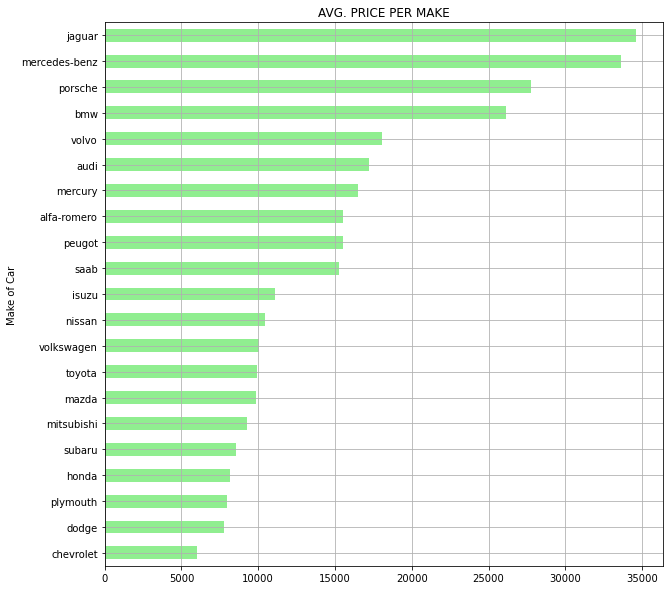


==================================== RELATION BETWEEN MAKE AND ENGINE-SIZE ==================================== 

make
chevrolet         62.666667
isuzu             77.000000
mazda             79.333333
honda             80.230769
volkswagen        81.083333
dodge             84.375000
subaru            86.250000
plymouth          86.714286
toyota            92.781250
peugot            99.818182
nissan           102.555556
mitsubishi       104.076923
audi             121.000000
alfa-romero      125.333333
saab             126.666667
volvo            128.000000
bmw              138.875000
mercedes-benz    146.250000
mercury          175.000000
jaguar           204.666667
porsche          210.400000
Name: horsepower, dtype: float64


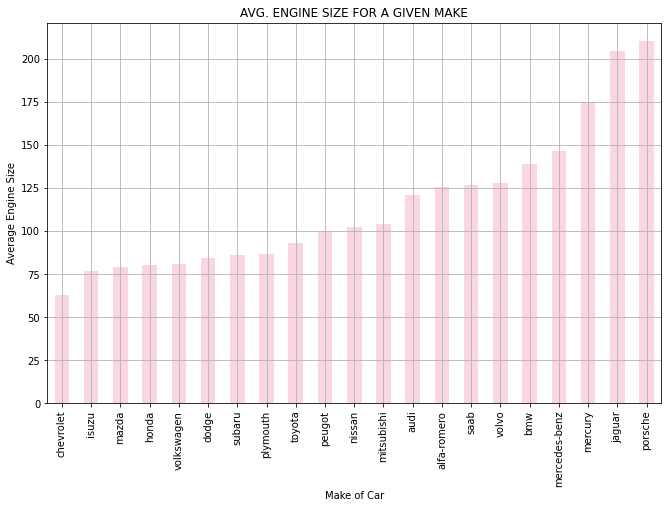


==================================== RELATION BETWEEN PRICE AND ENGINE-SIZE==================================== 

     engine-size    price
0             90   6692.0
1            171  15690.0
3            108   7603.0
4            141  15985.0
5            164  24565.0
..           ...      ...
193          110  12945.0
194           92   6529.0
195           79   5399.0
196          308  40960.0
197          120  15580.0

[197 rows x 2 columns]


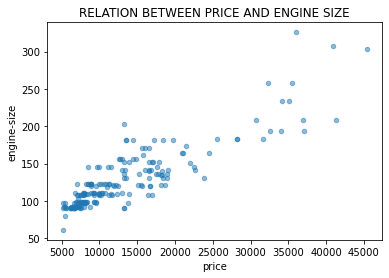


==================================== AVG PRICE AND AVG ENGINE-SIZE FOR EACH MAKE ==================================== 

                      price  engine-size
make                                    
chevrolet       6007.000000    80.333333
honda           8184.692308    99.307692
isuzu          11106.961340   102.500000
dodge           7790.125000   103.250000
plymouth        7963.428571   106.285714
subaru          8541.250000   107.083333
volkswagen     10077.500000   107.250000
mazda           9852.000000   111.583333
mitsubishi      9239.769231   118.307692
toyota          9885.812500   118.812500
saab           15223.333333   121.000000
nissan         10415.666667   127.888889
audi           17207.488954   130.714286
peugot         15489.090909   135.818182
alfa-romero    15498.333333   137.333333
mercury        16503.000000   140.000000
volvo          18063.181818   142.272727
bmw            26118.750000   166.875000
porsche        27779.884536   187.200000
mercedes-benz  336

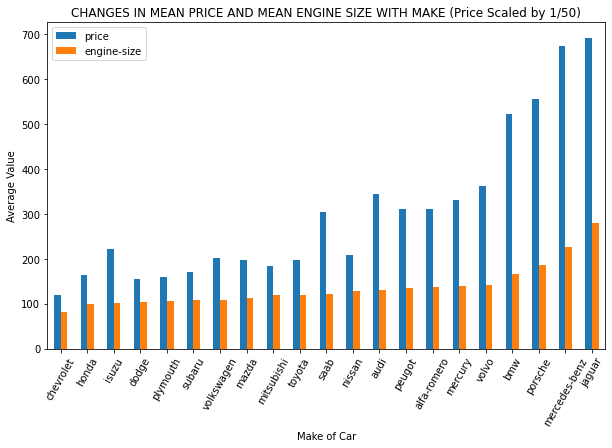

In [5]:
'''Sub-Task 2.2: Choosing three pairs of columns and exploring the relationship between the two columns involved in 
each pair via appropriate descriptive statistics and visualisation tools. Your choice of the column pairs should 
intend to address some “plausible hypotheses” on the data.'''

'''
COLUMNS CHOSEN ARE MAKE, ENGINE-SIZE & PRICE
   Hypothesis: 
   1. Cars of high-end brands will be more expensive. 
   2. Higher-end car brands have bigger engines in general.
   3. The bigger the engine the higher the price.   
'''

#using describe function for descriptive statistics
print('\n======================================= PRICE STATS FOR EACH MAKE ===============================\n')
print(df4.groupby('make')['price'].describe())


print('\n==================================== ENGINE SIZE STATS FOR EACH MAKE ===============================\n')
print(df4.groupby('make')['engine-size'].describe())




print('\n====================================  RELATION BETWEEN MAKE AND PRICE  ==================================== \n')
print(df4.groupby('make').price.mean().sort_values())
fig221=df4.groupby('make').price.mean().sort_values().plot(kind='barh', figsize=(10,10), title='AVG. PRICE PER MAKE', xlabel='Make of Car', ylabel='Average Price', grid=True, color='lightgreen')
plt.savefig("fig221.jpeg")
plt.show(fig221)


print('\n==================================== RELATION BETWEEN MAKE AND ENGINE-SIZE ==================================== \n')
print(df4.groupby('make')['horsepower'].mean().sort_values())
fig222=df4.groupby('make')['horsepower'].mean().sort_values().plot(kind='bar', title='AVG. ENGINE SIZE FOR A GIVEN MAKE', xlabel='Make of Car', ylabel='Average Engine Size', grid=True, color=(0.9, 0.2, 0.5, 0.2), figsize=(11,7))
plt.savefig("fig222.jpeg")
plt.show(fig222)


print('\n==================================== RELATION BETWEEN PRICE AND ENGINE-SIZE==================================== \n')
print(df4[['engine-size','price']])
fig223=df4[['engine-size','price']].plot(kind='scatter', x='price', y='engine-size', alpha=0.5, xlabel='Price', ylabel='Engine Size', title='RELATION BETWEEN PRICE AND ENGINE SIZE')
plt.savefig("fig223.jpeg")
plt.show(fig223)


print('\n==================================== AVG PRICE AND AVG ENGINE-SIZE FOR EACH MAKE ==================================== \n')
print(df4.groupby('make').agg({'price':'mean', 'engine-size':'mean'}).sort_values(by='engine-size'))
fig224=df4.groupby('make').agg({'price':lambda x: sum(x)/(len(x)*50),'engine-size':'mean'}).sort_values(by='engine-size').plot(kind='bar', figsize=(10,6), rot=60, xlabel='Make of Car', ylabel='Average Value', title='CHANGES IN MEAN PRICE AND MEAN ENGINE SIZE WITH MAKE (Price Scaled by 1/50)')
plt.savefig("fig224.jpeg")
plt.show(fig224)


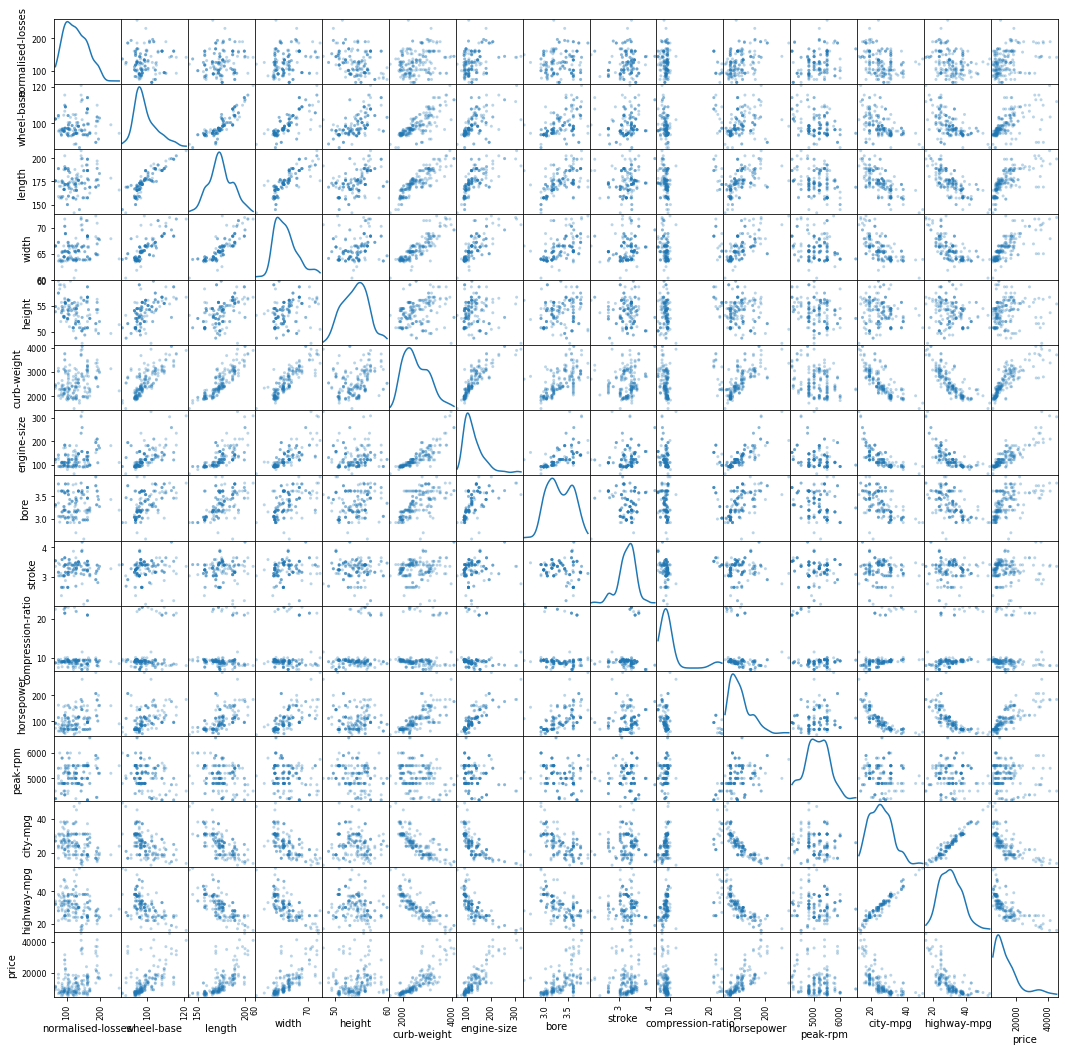

In [6]:
'''Sub-Task 2.3: Building a scatter matrix for all numerical columns'''
df11=pd.DataFrame()

#creating a dataframe with only numeric columns which are 15 (id and symboling being considered categorical)
for i in num_columns:
    df11=pd.concat([df11, df4[i]], axis=1)
fig23=pd.plotting.scatter_matrix(df11, alpha=0.3, figsize=(18, 18), diagonal='kde')
#KDE graph can give the the probability density function for any variable
plt.savefig("fig23.jpeg")
plt.show(fig23.any())
